In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Minimizing a cost function

In [15]:
w = tf.Variable(0,dtype=tf.float32)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# Store values for visualization
cost_values = []

# Training function
def train_step():
    with tf.GradientTape() as tape:
        cost = w ** 2 - 10 * w + 25  # Cost function
    grads = tape.gradient(cost, [w])
    optimizer.apply_gradients(zip(grads, [w]))
    print("cost = %f, w = %f" % (cost, w.numpy()))
    cost_values.append(cost)


In [16]:
for i in range(1000):
    train_step()

cost = 25.000000, w = 0.099999
cost = 24.010006, w = 0.199941
cost = 23.040571, w = 0.299785
cost = 22.092026, w = 0.399489
cost = 21.164700, w = 0.499013
cost = 20.258884, w = 0.598313
cost = 19.374844, w = 0.697346
cost = 18.512831, w = 0.796067
cost = 17.673056, w = 0.894430
cost = 16.855705, w = 0.992391
cost = 16.060930, w = 1.089903
cost = 15.288858, w = 1.186920
cost = 14.539577, w = 1.283396
cost = 13.813148, w = 1.379283
cost = 13.109593, w = 1.474535
cost = 12.428904, w = 1.569105
cost = 11.771038, w = 1.662948
cost = 11.135918, w = 1.756016
cost = 10.523432, w = 1.848265
cost = 9.933437, w = 1.939648
cost = 9.365756, w = 2.030121
cost = 8.820181, w = 2.119641
cost = 8.296471, w = 2.208163
cost = 7.794353, w = 2.295647
cost = 7.313526, w = 2.382050
cost = 6.853664, w = 2.467332
cost = 6.414410, w = 2.551454
cost = 5.995378, w = 2.634378
cost = 5.596167, w = 2.716068
cost = 5.216345, w = 2.796488
cost = 4.855465, w = 2.875605
cost = 4.513052, w = 2.953387
cost = 4.188627, w = 

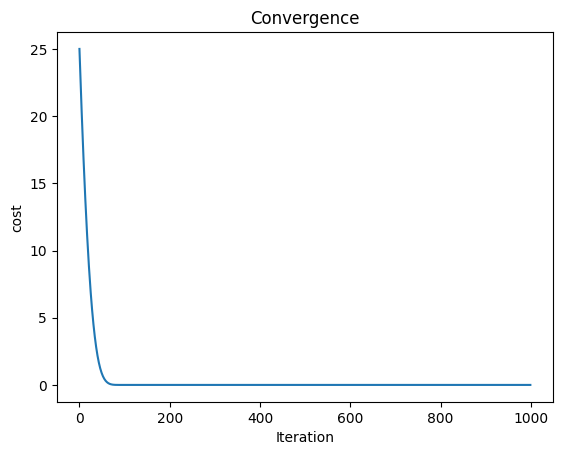

Final optimized w: 5.000000953674316


In [17]:
# Plot convergence
plt.plot(cost_values)
plt.xlabel("Iteration")
plt.ylabel("cost")
plt.title("Convergence")
plt.show()

print(f"Final optimized w: {w.numpy()}")

### Linear regression with tensorflow


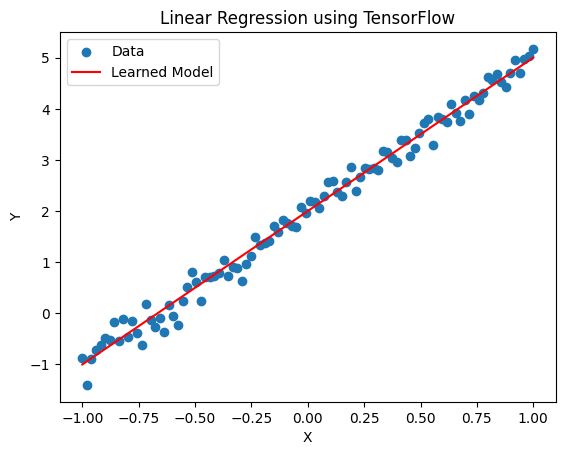

Learned parameters: w = 3.0009827613830566, b = 2.0016849040985107


In [18]:

# Generate synthetic data: y = 3x + 2 + noise
X = np.linspace(-1, 1, 100)
Y = 3 * X + 2 + np.random.randn(*X.shape) * 0.2  # Adding noise

# Define trainable parameters
w = tf.Variable(0.0)
b = tf.Variable(0.0)
optimizer = tf.keras.optimizers.Adam(0.1)

# Training function
def train_step():
    with tf.GradientTape() as tape:
        Y_pred = w * X + b  # Prediction
        loss = tf.reduce_mean((Y - Y_pred) ** 2)  # Mean Squared Error (MSE)
    grads = tape.gradient(loss, [w, b])
    optimizer.apply_gradients(zip(grads, [w, b]))

# Run training
for i in range(100):
    train_step()

# Plot results
plt.scatter(X, Y, label="Data")
plt.plot(X, w.numpy() * X + b.numpy(), color='red', label="Learned Model")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression using TensorFlow")
plt.show()

print(f"Learned parameters: w = {w.numpy()}, b = {b.numpy()}")